In [1]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
dataframe=pd.read_csv('pima-indians-diabetes.csv',delimiter=',')
dataframe.head()


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [2]:
X=dataframe.iloc[:,:8]
y=dataframe.iloc[:,8]
dataframe.shape


(767, 9)

In [3]:
features_train,features_test,target_train,target_test=train_test_split(X,y,
test_size=0.33,random_state=0)


In [5]:
network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))


In [6]:
network.add(Dense(units=1,activation="sigmoid"))

In [7]:
network.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))


Epoch 1/20
6/6 [==============================] - 1s 54ms/step - loss: 16.8979 - accuracy: 0.3684 - val_loss: 17.0751 - val_accuracy: 0.3071
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 15.2065 - accuracy: 0.3684 - val_loss: 15.2690 - val_accuracy: 0.2992
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 13.5663 - accuracy: 0.3684 - val_loss: 13.5498 - val_accuracy: 0.3071
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 12.0422 - accuracy: 0.3665 - val_loss: 11.9543 - val_accuracy: 0.3268
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 10.6312 - accuracy: 0.3684 - val_loss: 10.5256 - val_accuracy: 0.3661
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 9.3302 - accuracy: 0.3762 - val_loss: 9.2575 - val_accuracy: 0.3622
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 8.2990 - accuracy: 0.3899 - val_loss: 8.1666 - val_accuracy: 0.3858
Epoch 8/20
6/6 [=======

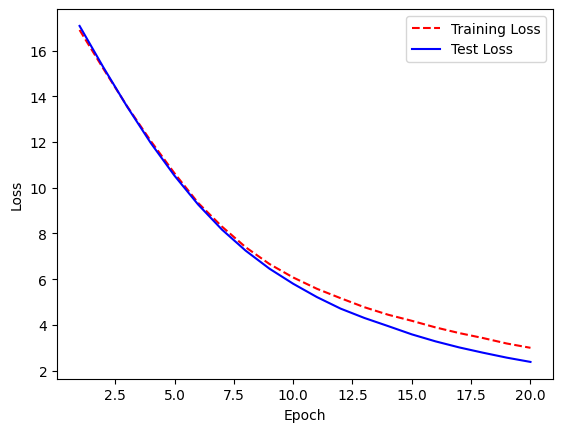

In [10]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [11]:
_,accuracy=network.evaluate(features_train,target_train)


17/17 [==============================] - 0s 1ms/step - loss: 2.8642 - accuracy: 0.5244


In [12]:
print('Accuracy: %.2f'%(accuracy*100))


Accuracy: 52.44


In [13]:
predicted_target=network.predict(features_test)
_,accuracy=network.evaluate(features_test,target_test)
print('Accuracy: %.2f'%(accuracy*100))

8/8 [==============================] - 0s 1ms/step - loss: 2.3800 - accuracy: 0.5787
Accuracy: 57.87


In [18]:
for i in range(10):
    print(predicted_target[i])


[7.191623e-06]
[0.9985413]
[6.286535e-07]
[0.8603236]
[0.00020826]
[0.99608254]
[0.9950301]
[0.7614767]
[0.00223065]
[0.4547817]


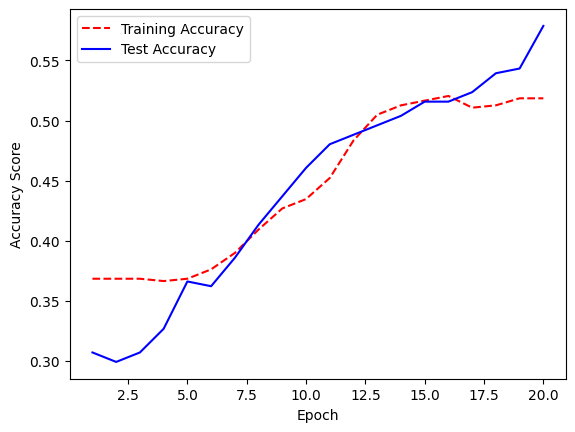

In [19]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()